# Connect Google Drive to Colab

In [0]:
from google.colab import drive
drive.mount('/content/gdrive') # must log into google account

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/Kaggle_Mental_Health') # change working directory to kaggle
os.listdir()

['survey.csv', 'tech_health.ipynb']

# Dataset Information

This dataset is from a **2014** survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.

https://www.kaggle.com/osmi/mental-health-in-tech-2016

## Content

This dataset contains the following data:



*   Timestamp
*   Age
*   Gender
*   Country
*   state: If you live in the United States, which state or territory do you live in?
* self_employed: Are you self-employed?

* family_history: Do you have a family history of mental illness?

* treatment: Have you sought treatment for a mental health condition?

* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

* no_employees: How many employees does your company or organization have?

* remote_work: Do you work remotely (outside of an office) at least 50% of the time?

* tech_company: Is your employer primarily a tech company/organization?

* benefits: Does your employer provide mental health benefits?

* care_options: Do you know the options for mental health care your employer provides?

* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

* leave: How easy is it for you to take medical leave for a mental health condition?

* mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

* physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

* coworkers: Would you be willing to discuss a mental health issue with your coworkers?

* supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

* mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

* physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

* mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

* comments: Any additional notes or comments


# Exploratory Data Analysis

https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from plotly.subplots import make_subplots

In [0]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [0]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [0]:
df.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:54:11,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
x = df.Gender.value_counts().index.tolist()[::-1]
y = df.Gender.value_counts().tolist()[::-1]
data = pd.DataFrame({'name': x, 'count': y})

fig = px.bar(data, x="count", y="name", orientation='h')

# Update Figure Visuals
fig.update_layout(
    height=1000, width=800, 
    template="plotly_dark",
    title_text="Gender Count" # Name of Plot
    )

fig.show()

In [0]:
# Interactive tool to relabel Gender Pronouns
# If Male pronoun enter 1
# If Female pronoun enter 2
# If Other, press any other button

male_pronouns = []
female_pronouns =[]
other = []

for p in df.Gender.unique():
  print(p)
  x = input()
  if x == '1': # male
    male_pronouns.append(p)
  elif x == '2': # female
    female_pronouns.append(p)
  else: # other
    other.append(p)

In [0]:
# After Relabeling, these are the final listing of pronouns
male_pronouns = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'Cis Male', 
                 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 
                 'cis male', 'Malr', 'Cis Man']

female_pronouns = ['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 
                   'Femake', 'woman', 'Female ', 'cis-female/femme', 
                   'Female (cis)', 'femail']

other = ['Trans-female', 'something kinda male?', 'queer/she/they', 
         'non-binary', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 
         'Androgyne', 'Agender', 'Guy (-ish) ^_^', 'male leaning androgynous', 
         'Trans woman', 'Neuter', 'Female (trans)', 'queer', 
         'A little about you', 'p', 
         'ostensibly male, unsure what that really means']


In [0]:
# Change the names of some genders
reduced_pronouns = [{p: 'Male' for p in male_pronouns},
                    {p: 'Female' for p in female_pronouns},
                    {p: 'Other' for p in other}]

for p in reduced_pronouns:
  df.Gender = df.Gender.replace(p)

In [0]:
df.Gender.value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [0]:
# check value count
x = df.Gender.value_counts().index.tolist()
y = df.Gender.value_counts().tolist()

fig = make_subplots(rows=1, cols=2)

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]])


DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

colors = DEFAULT_PLOTLY_COLORS[:len(x)]

# Add bar graph of Gender Count
fig.add_trace(
    go.Bar(x=x, y=y,
           text=y,
           textposition='auto',
           marker_color=colors,
           showlegend=False), 
    row=1, col=1
)

# Add pie chart of Gender Count
fig.add_trace(
    go.Pie(labels=x, values=y,
           marker_colors=colors
           ),
    row=1, col=2
)

# Update Figure Visuals
fig.update_layout(
    height=600, width=800, 
    template="plotly_dark",
    title_text="Gender Count" # Name of Plot
    )

fig.show()

In [0]:
x = df.state.value_counts().index.tolist()
y = df.state.value_counts().tolist()

fig = go.Figure(go.Bar(x=x,y=y))

fig.show()

In [0]:
import plotly.express as px
# survey sample population in USA
fig = px.choropleth(locations=x, locationmode="USA-states", color=y, 
                    scope="usa",
                    color_continuous_scale = 'Reds')

fig.update_layout(
    title_text = '2014 Mental Health Survey',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [0]:
# oldest person ever lived is 122
# assume only employing adults (>18)
idx = (df.Age >= 18) & (df.Age < 122)

x = df.Age[idx].value_counts().index.tolist()
y = df.Age[idx].value_counts().tolist()

fig = go.Figure(
    go.Bar(x=x,y=y)
    )

fig.update_layout(
    title_text = 'Age distribution',
    
)

fig.show()

# Distribution of Gender

In [0]:
# Add histogram data
idx = (df.Age >= 18) & (df.Age < 122)
x1 = df.Age[idx][df.Gender=='Male']
x2 = df.Age[idx][df.Gender=='Female']

# Group data together
hist_data = [x1, x2]

group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels)
fig.show()

# Distribution of Gender in Tech

In [0]:
# Add histogram data
idx = (df.Age >= 18) & (df.Age < 122) & (df.tech_company=='Yes')
x1 = df.Age[idx][df.Gender=='Male']
x2 = df.Age[idx][df.Gender=='Female']

# Group data together
hist_data = [x1, x2]

group_labels = ['Male', 'Female']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels)
fig.show()

We can see from our sample, women tend to be younger than men

In [0]:
column_names = ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
                'family_history', 'treatment', 'work_interfere', 'no_employees',
                'remote_work', 'tech_company', 'benefits', 'care_options',
                'wellness_program', 'seek_help', 'anonymity', 'leave',
                'mental_health_consequence', 'phys_health_consequence', 'coworkers',
                'supervisor', 'mental_health_interview', 'phys_health_interview',
                'mental_vs_physical', 'obs_consequence', 'comments']

In [0]:
ordered_labels = {
    'Gender': ['Male', 'Female', 'Other'],
    'anonymity': ['No', 'Yes', "Don't know"],
    'benefits': ['No', 'Yes', "Don't know"],
    'care_options': ['No', 'Yes', 'Not sure'],
    'coworkers': ['No', 'Some of them', 'Yes'],
    'family_history': ['No', 'Yes'],
    'leave': ['Very difficult',
      'Somewhat difficult',
      'Somewhat easy',
      'Very easy',
      "Don't know"],
    'mental_health_consequence': ['No', 'Maybe', 'Yes'],
    'mental_health_interview': ['No', 'Maybe', 'Yes'],
    'mental_vs_physical': ['No', 'Yes', "Don't know"],
    'no_employees': ['1-5',
      '6-25',
      '26-100',
      '100-500',
      '500-1000',
      'More than 1000'],
    'obs_consequence': ['No', 'Yes'],
    'phys_health_consequence': ['No', 'Maybe', 'Yes'],
    'phys_health_interview': ['No', 'Maybe', 'Yes'],
    'remote_work': ['No', 'Yes'],
    'seek_help': ['No', 'Yes', "Don't know"],
    'self_employed': ['No', 'Yes'],
    'supervisor': ['No', 'Some of them', 'Yes'],
    'tech_company': ['No', 'Yes'],
    'treatment': ['No', 'Yes'],
    'wellness_program': ['No', 'Yes', "Don't know"],
    'work_interfere': ['Never', 'Rarely', 'Sometimes', 'Often']
    }

In [0]:
# find all columns with at most 5 unique entries for bar graph
bars = []
for c in df.columns:
  if len(df[c].unique()) <=6:
    bars.append(c)

size = round(len(bars)**(1/2))

fig = make_subplots(
    rows=size, cols=size,
    subplot_titles=bars)

j = 1
for i, c in enumerate(bars):
  x_temp = df[c].value_counts().index.tolist()
  y_temp = df[c].value_counts().tolist()

  # resort x labels
  x = []
  y = []
  for label in ordered_labels[c]:
    try:
      index = x_temp.index(label)
      x.append(x_temp[index])
      y.append(y_temp[index])
    except Exception as e:
      x.append(label)
      y.append(0)

  if i % size == 0 and i > 0:
      j += 1

  # add figure to subplot
  fig.add_trace(go.Bar(x=x, y=y, 
                       text=y,
                       textposition='auto',
                       showlegend=False),
                row=j, col=(i % size)+1)
  
fig.update_layout(title_text="2014 Health Survey In Tech",
                  height=1000, 
                  # width=800, 
                  )

fig.show()

In [0]:
# MALE VS FEMALE
def cat_plot(df, CAT_x, CAT_y, title=""):
  """
  Categorical plot to display between 2 variables
  Displays the plot

  CAT_x is x-axis
  CAT_y is y-axis

  title is name of entire plot
  """

  CAT_x, CAT_y = CAT_y, CAT_x # to lazy to change code below, easier to swap

  fig = make_subplots(
      rows=1, cols=1,
      subplot_titles=[f'{CAT_y} vs. {CAT_x}'])

  for label_x in ordered_labels[CAT_x]:

    data = df[CAT_y][df[CAT_x] == label_x].value_counts()

    
    x_temp = data.index.tolist()
    y_temp = data.tolist()

    # resort x labels
    x = []
    y = []
    for label_y in ordered_labels[CAT_y]:
      try: # element not in list
        index = x_temp.index(label_y)
        x.append(x_temp[index])
        y.append(y_temp[index])
      except Exception as e:
        x.append(label_y)
        y.append(0)


    fig.add_trace(go.Bar(x=x,
                        y=y,
                        text=y,
                        textposition='auto',
                        showlegend=True,
                        name=label_x))
  
  fig.update_layout(title_text=f"2014 Health Survey In Tech-{title}",
                  height=300, 
                  width=800, 
                  )

  fig.show()

In [0]:
column_names = ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
                'family_history', 'treatment', 'work_interfere', 'no_employees',
                'remote_work', 'tech_company', 'benefits', 'care_options',
                'wellness_program', 'seek_help', 'anonymity', 'leave',
                'mental_health_consequence', 'phys_health_consequence', 'coworkers',
                'supervisor', 'mental_health_interview', 'phys_health_interview',
                'mental_vs_physical', 'obs_consequence', 'comments']

In [0]:
CAT_x = 'family_history' # category on x label
CAT_y = 'obs_consequence' # category on y label
cat_plot(df,
    CAT_x, CAT_y)

In [0]:
def cat_plot_3(df, x, y, z):
  """
  3 dim categorical plot
  x is x-axis
  y is y-axis
  z is different plot
  """
  for label in ordered_labels[z]:
    cat_plot(df[df[z] == label],
             CAT_x, CAT_y,
             title=f'{z}={label}')

CAT_x = 'family_history' # category on x label
CAT_y = 'obs_consequence' # category on y label
CAT_z = 'tech_company'

cat_plot_3(df, CAT_x, CAT_y, CAT_z)

# NLP - WordCloud for comments

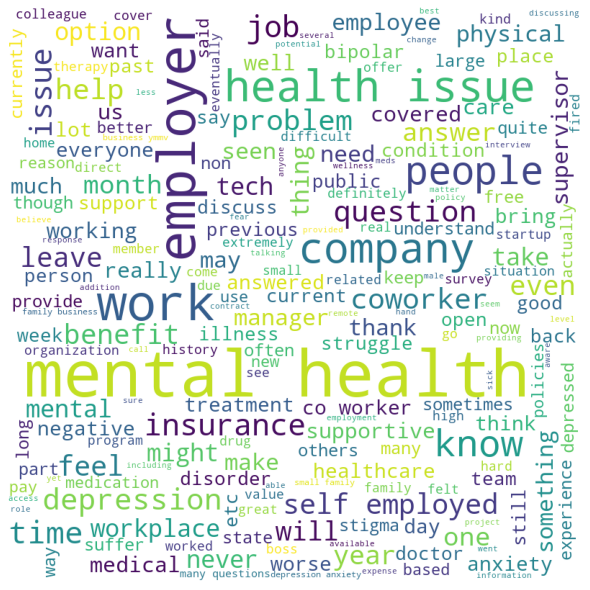

In [0]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from tqdm.auto import tqdm # loading bar
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tqdm(df.comments[~df.comments.isnull()]):
      
  # typecaste each val to string 
  val = str(val) 

  # split the value 
  tokens = val.split() 
    
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
      tokens[i] = tokens[i].lower() 
    
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 